## K近傍法とは

参考：https://qiita.com/yshi12/items/26771139672d40a0be32

KNN(K Nearest Neighbor)。クラス判別用の手法。
学習データをベクトル空間上にプロットしておき、未知のデータが得られたら、そこから距離が近い順に任意のK個を取得し、多数決でデータが属するクラスを推定する。

例えば下図の場合、クラス判別の流れは以下となる。

1. 既知のデータをプロットしておく。
2. 参考とする近傍点の数Kを決めておく。K=3とか。
3. 未知のデータが得られたら、近傍の点のものから合計K個だけ取得する。
4. 選択した近傍点が属するクラスの多数決で、未知データの属するクラスを推定する


<img  src="k近傍法イメージ.png"/>

## 実例

### 利用データ用意
sklearnでirisのデータセットを用意。

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
iris= load_iris() # irisデータ取得
X = iris.data     # 説明変数(クラス推定用変数)
Y = iris.target   # 目的変数(クラス値)

# irisのデータをDataFrameに変換
iris_data = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_target = pd.DataFrame(Y, columns=['Species'])

# iris_targetが0〜2の値で分かりづらいので、あやめの名前に変換
def flower(num):
    """名前変換用関数"""
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

iris_target['Species'] = iris_target['Species'].apply(flower)
iris = pd.concat([iris_data, iris_target], axis=1)

In [4]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


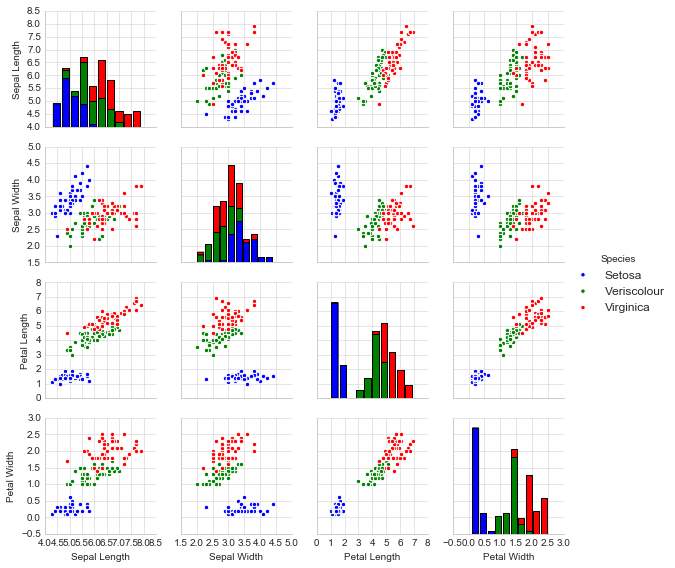

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

sns.pairplot(iris, hue = 'Species', size =2) # hue:指定したデータで分割

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split # trainとtest分割用

# train用とtest用のデータ用意。test_sizeでテスト用データの割合を指定。random_stateはseed値を適当にセット。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=3) 
knn = KNeighborsClassifier(n_neighbors=6) # インスタンス生成。n_neighbors:Kの数
knn.fit(X_train, Y_train)                 # モデル作成実行
Y_pred = knn.predict(X_test)              # 予測実行

# 精度確認用のライブラリインポートと実行
from sklearn import metrics
metrics.accuracy_score(Y_test, Y_pred)    # 予測精度計測

0.94999999999999996

In [9]:
accuracy = []
for k in range(1, 90):
    knn = KNeighborsClassifier(n_neighbors=k) # インスタンス生成。
    knn.fit(X_train, Y_train)                 # モデル作成実行
    Y_pred = knn.predict(X_test)              # 予測実行
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred)) # 精度格納

plt.plot(k_range, accuracy)

NameError: name 'k_range' is not defined